In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score



In [18]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [21]:
# Predictions and Overfitting Check
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Overfitting Check: Linear Regression")
print(f"Training R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Training MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}\n")



Overfitting Check: Linear Regression
Training R²: 0.5279, Test R²: 0.4526
Training MSE: 2868.55, Test MSE: 2900.19



If training R² is high but test R² is low, overfitting is present.

#### Applying Regularization

In [22]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)



ElasticNet(alpha=0.1)

In [23]:
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elasticnet = elasticnet.predict(X_test)



In [24]:
metrics = {
    "Model": ["Linear Regression", "Ridge", "Lasso", "ElasticNet"],
    "MSE": [
        mse_test,
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_elasticnet),
    ],
    "R² Score": [
        r2_test,
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elasticnet),
    ],
}



In [25]:
print("Model Performance After Regularization:")
for i in range(4):
    print(f"{metrics['Model'][i]} - MSE: {metrics['MSE'][i]:.2f}, R²: {metrics['R² Score'][i]:.4f}")



Model Performance After Regularization:
Linear Regression - MSE: 2900.19, R²: 0.4526
Ridge - MSE: 3077.42, R²: 0.4192
Lasso - MSE: 2798.19, R²: 0.4719
ElasticNet - MSE: 4775.47, R²: 0.0987


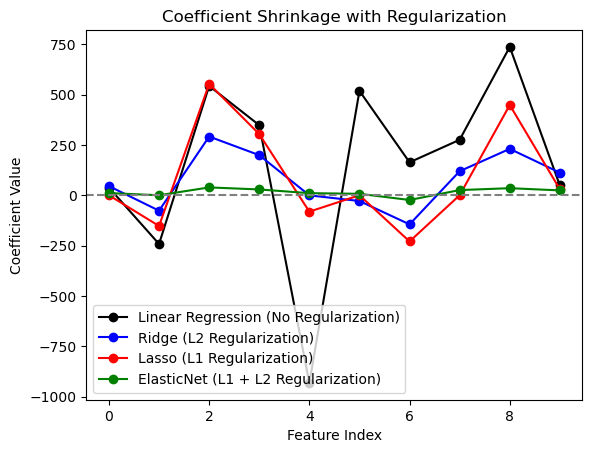

In [28]:
# Plotting Coefficient Shrinkage

plt.plot(lr.coef_, "o-", label="Linear Regression (No Regularization)", color="black")
plt.plot(ridge.coef_, "o-", label="Ridge (L2 Regularization)", color="blue")
plt.plot(lasso.coef_, "o-", label="Lasso (L1 Regularization)", color="red")
plt.plot(elasticnet.coef_, "o-", label="ElasticNet (L1 + L2 Regularization)", color="green")
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Shrinkage with Regularization")
plt.legend()
